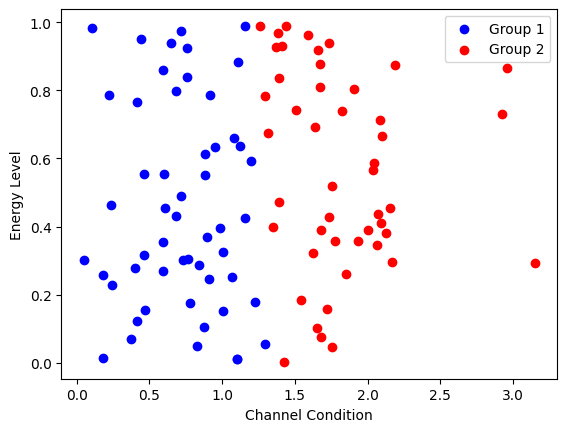

Group 1:
[[0.95137684 0.63283713 0.59128004]
 [0.46172118 0.31681647 0.52492456]
 [0.98768857 0.39508961 0.22215388]
 [0.71798311 0.97419063 0.31960213]
 [0.68560749 0.43224043 0.8679023 ]
 [0.87753465 0.10501485 0.91308075]
 [0.41183599 0.76494533 0.40808423]
 [1.22452185 0.17891647 0.2810773 ]
 [0.59492695 0.35508665 0.72598155]
 [0.59518933 0.85948464 0.43881808]
 [1.12412276 0.63668886 0.93415653]
 [0.68499118 0.79823905 0.76246117]
 [0.37055868 0.0695782  0.44395136]
 [1.10320313 0.01083667 0.43930426]
 [1.29477038 0.05475774 0.89928653]
 [0.82618779 0.04832485 0.08534384]
 [0.76549981 0.30482895 0.8276258 ]
 [0.23664497 0.46469341 0.05797584]
 [0.10381699 0.9841429  0.56264854]
 [0.04964513 0.30193063 0.88585505]
 [0.6027575  0.55410489 0.37484204]
 [1.09911468 0.01113886 0.0020608 ]
 [0.40215122 0.27850954 0.32389423]
 [0.88195828 0.55219632 0.86365997]
 [0.44601069 0.95190628 0.42300097]
 [0.91526837 0.78608296 0.97126834]
 [0.91288568 0.24538074 0.49830521]
 [1.1551083  0.9890

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Parameters
N = 100 # number of panels in the IRS panel
SNR_dB = np.linspace(-20, 30, 51) # SNR ranging from -20dB to 30 dB
SNR = 10**(SNR_dB/10)

# Simulate channel conditions, energy levels, and signal reception capabilities of RIS elements
h = np.random.rayleigh(1, N) # Rayleigh fading channel
P = np.random.uniform(0, 1, N) # energy levels
r = np.random.uniform(0, 1, N) # signal reception capabilities

# Grouping of RIS elements using KMeans clustering
X = np.column_stack((h, P, r))
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
labels = kmeans.labels_

# Divide RIS elements into two groups
group1 = X[labels==0]
group2 = X[labels==1]

# Create two additional groups for energy and signal transmission
energy_group = np.concatenate((group1[:group1.shape[0]//2], group2[:group2.shape[0]//2]))
signal_group = np.concatenate((group1[group1.shape[0]//2:], group2[group2.shape[0]//2:]))

# Print results
plt.scatter(group1[:,0], group1[:,1], c='b', label='Group 1')
plt.scatter(group2[:,0], group2[:,1], c='r', label='Group 2')
plt.legend()
plt.xlabel('Channel Condition')
plt.ylabel('Energy Level')
plt.show()

print("Group 1:")
print(group1)
print("Group 2:")
print(group2)
print("Energy Group:")
print(energy_group)
print("Signal Group:")
print(signal_group)


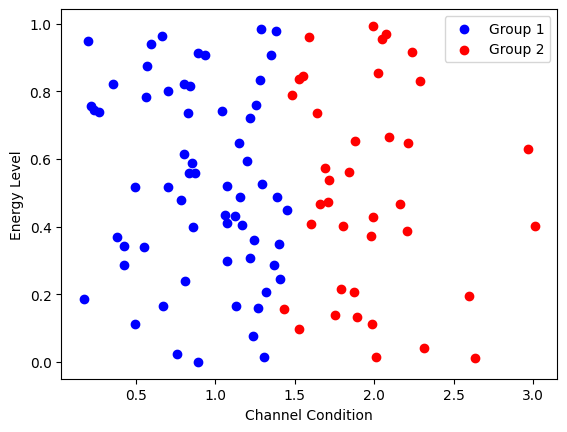

Group 1:
[[1.23737984e+00 7.56735712e-02 7.76450327e-01]
 [8.87992148e-01 3.69650888e-04 7.16701898e-01]
 [8.51953690e-01 5.87154423e-01 6.78682045e-01]
 [8.38322092e-01 8.15814175e-01 2.58872979e-01]
 [1.07426529e+00 4.11921176e-01 3.41635890e-01]
 [2.33537175e-01 7.45495313e-01 1.10632398e-01]
 [1.07303677e+00 2.99032541e-01 4.71634507e-02]
 [7.03070375e-01 7.99593761e-01 5.85568011e-01]
 [1.26781567e+00 1.59131896e-01 5.12247452e-01]
 [2.00076643e-01 9.47226625e-01 5.49706169e-01]
 [6.68558492e-01 1.64809617e-01 7.46690357e-01]
 [4.96872933e-01 5.18591093e-01 7.41706910e-01]
 [1.45120257e+00 4.49237997e-01 1.22222916e-01]
 [1.29110331e+00 5.25199691e-01 1.56975188e-01]
 [1.21888806e+00 3.07769146e-01 7.68308945e-01]
 [8.72172701e-01 5.59668220e-01 8.18140375e-01]
 [4.25364710e-01 3.42818987e-01 9.12525557e-01]
 [5.97584183e-01 9.38435417e-01 9.10556860e-01]
 [5.47702477e-01 3.40425868e-01 6.35065318e-01]
 [1.28405949e+00 9.85399186e-01 1.46175752e-01]
 [1.38406348e+00 9.79218036e-01

In [16]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed()

# Parameters
N = 100 # number of panels in the IRS panel
SNR_dB = np.linspace(-20, 30, 51) # SNR ranging from -20dB to 30 dB
SNR = 10**(SNR_dB/10)

# Simulate channel conditions, energy levels, and signal reception capabilities of RIS elements
h = np.random.rayleigh(1, N) # Rayleigh fading channel
P = np.random.uniform(0, 1, N) # energy levels
r = np.random.uniform(0, 1, N) # signal reception capabilities

# Grouping of RIS elements using KMeans clustering
X = np.column_stack((h, P, r))
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
labels = kmeans.labels_

# Divide RIS elements into two groups
group1 = X[labels==0]
group2 = X[labels==1]

# Create two additional groups for energy and signal transmission
energy_group = np.concatenate((group1[:group1.shape[0]//2], group2[:group2.shape[0]//2]))
signal_group = np.concatenate((group1[group1.shape[0]//2:], group2[group2.shape[0]//2:]))

# Print results
plt.scatter(group1[:,0], group1[:,1], c='b', label='Group 1')
plt.scatter(group2[:,0], group2[:,1], c='r', label='Group 2')
plt.legend()
plt.xlabel('Channel Condition')
plt.ylabel('Energy Level')
plt.show()

print("Group 1:")
print(group1)
print("Group 2:")
print(group2)
print("Energy Group:")
print(energy_group)
print("Signal Group:")
print(signal_group)
